# **Decision Tree**

## **1. Data Preparation:**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_excel('/content/heart_disease.xlsx', sheet_name = 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [41]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [42]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

## **2. Exploratory Data Analysis (EDA):**

In [43]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

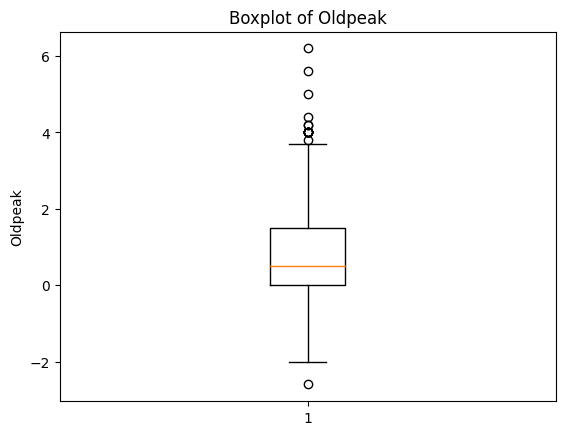

In [44]:
plt.boxplot(df['oldpeak'].dropna())
plt.title('Boxplot of Oldpeak')
plt.ylabel('Oldpeak')
plt.show()

In [45]:
df['oldpeak'].fillna(df['oldpeak'].median(), inplace = True)

In [46]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [47]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

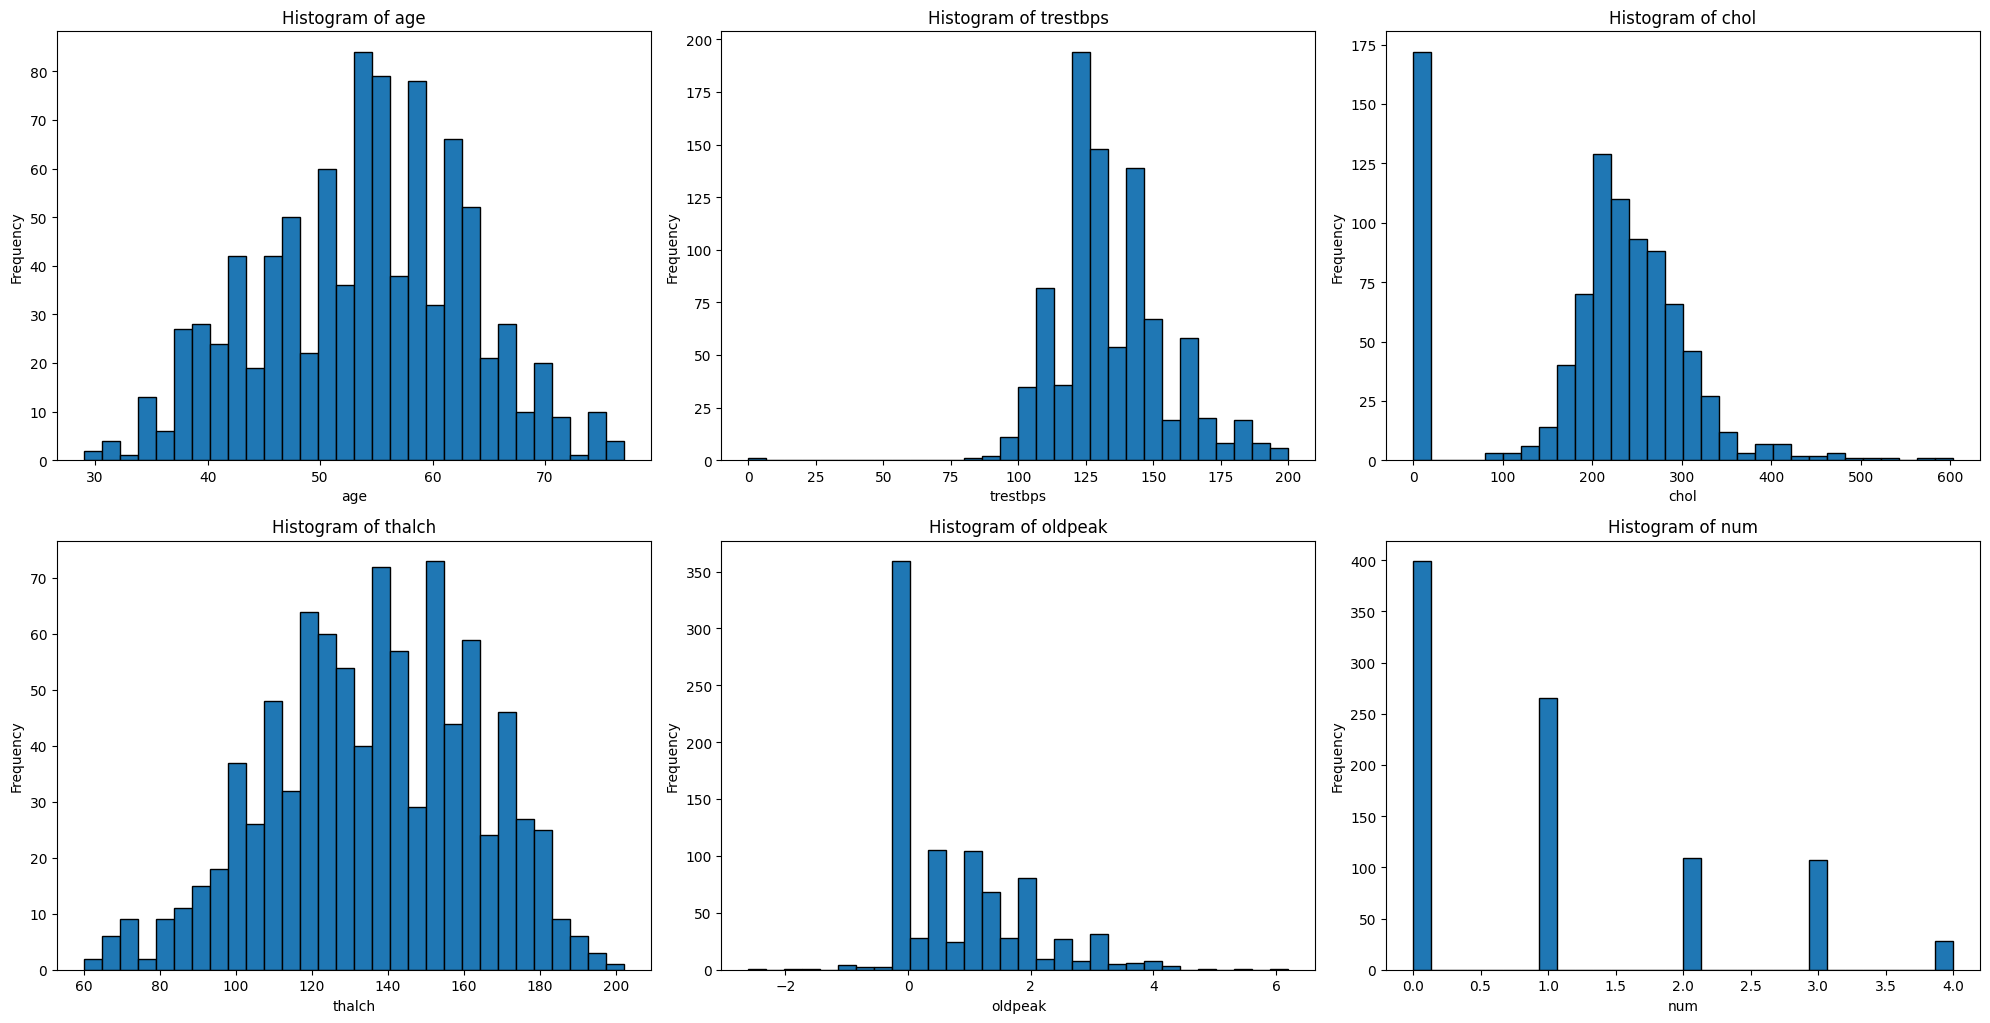

In [48]:
# Plot histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    plt.hist(df[col].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

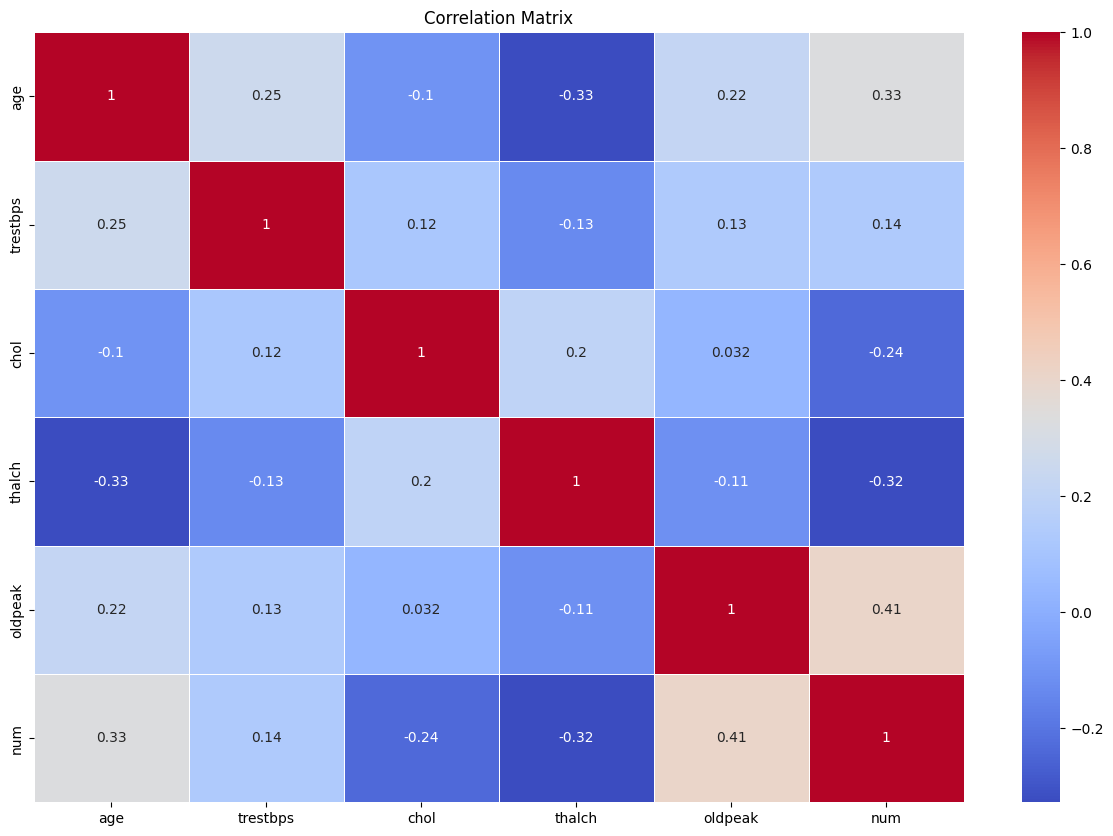

In [49]:
# Plot correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## **3. Feature Engineering:**

In [50]:
# Convert categorical columns to numerical using dummy variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,False,True,False,...,True,False,False,False,True,False,False,True,False,False
1,41,135,203,False,132,0.0,0,False,True,False,...,True,False,False,False,False,True,False,True,False,False
2,57,140,192,False,148,0.4,0,False,True,True,...,True,False,False,False,False,True,False,True,False,False
3,52,118,186,False,190,0.0,0,False,True,False,...,True,False,False,False,False,True,False,True,False,False
4,57,110,201,False,126,1.5,0,False,True,True,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,False,True,True,...,True,False,False,False,False,False,True,True,False,False
904,62,166,170,False,120,3.0,4,False,True,True,...,False,True,False,False,False,True,False,False,True,False
905,56,170,0,False,123,2.5,4,False,True,False,...,False,True,False,False,True,False,False,False,True,False
906,56,144,208,True,105,0.5,4,False,True,False,...,False,False,False,True,True,False,False,True,False,False


## **4. Decision Tree Classification:**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

In [52]:
X = df.drop('num', axis=1)
y = df['num']

In [53]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Initialize the Decision Tree Classifier with criterion 'entropy' and max depth of 2
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [55]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [56]:
dtc = DecisionTreeClassifier(random_state=42)

In [57]:
# Train the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
# Ensure that class_names matches the unique values in your target variable
class_names = [str(cls) for cls in sorted(y.unique())]

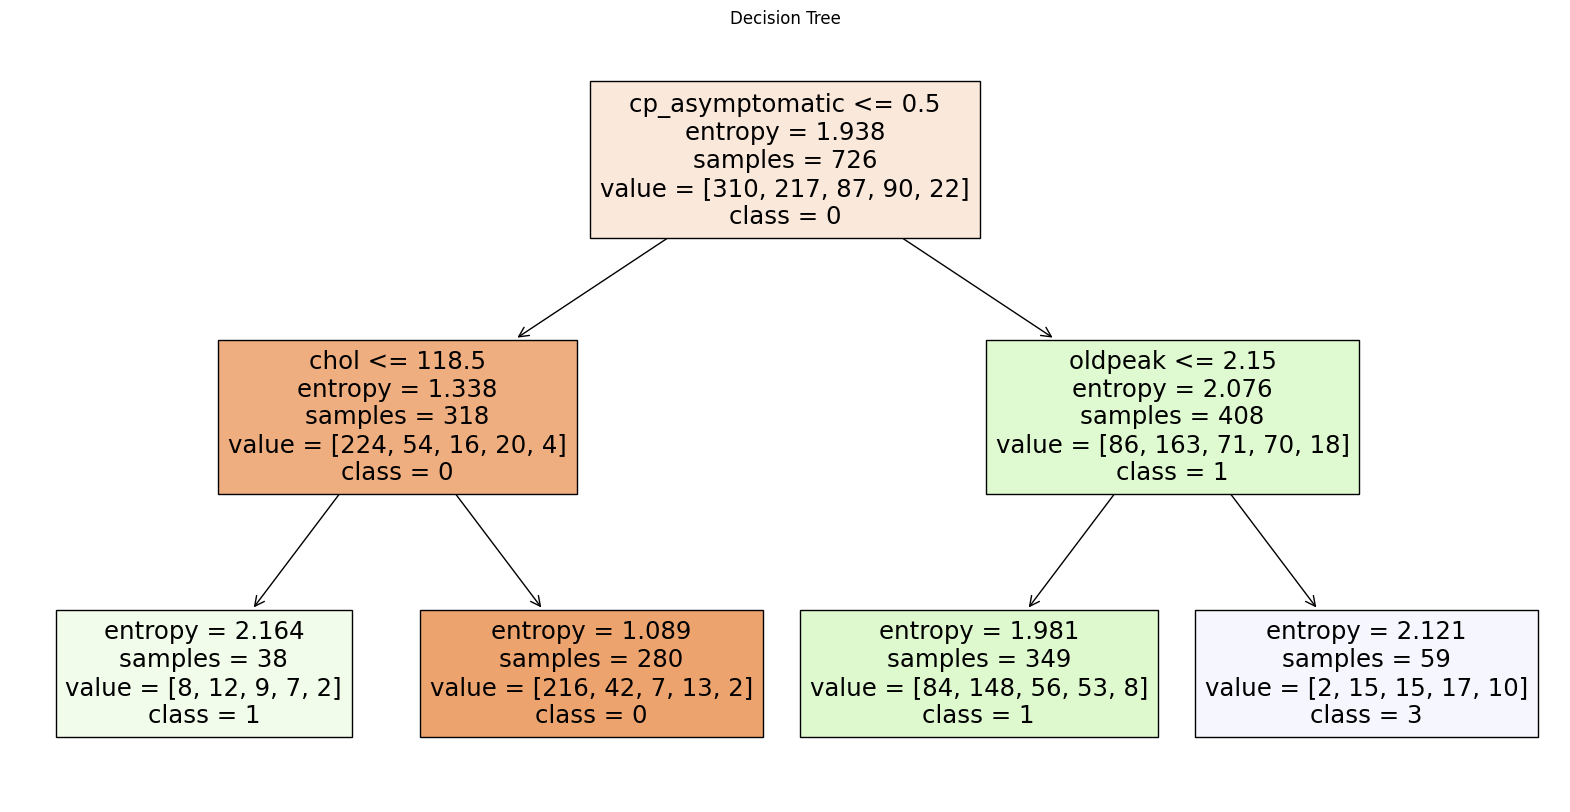

In [59]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=class_names)
plt.title('Decision Tree')
plt.show()

## **5. Hyperparameter Tuning:**

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 10, 15]
}

In [62]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')

In [63]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [64]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [65]:
print("Best Parameters:")
print(best_params)
print("\nBest Cross-Validation Score:")
print(best_score)

Best Parameters:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 15}

Best Cross-Validation Score:
0.5234104865375532


In [66]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_

In [67]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

## **6. Model Evaluation and Analysis:**

In [68]:
# Evaluate the optimized model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[77  6  4  2  0]
 [20 23  1  4  0]
 [ 5 12  3  2  0]
 [ 5  8  2  2  0]
 [ 2  3  0  1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        89
           1       0.44      0.48      0.46        48
           2       0.30      0.14      0.19        22
           3       0.18      0.12      0.14        17
           4       0.00      0.00      0.00         6

    accuracy                           0.58       182
   macro avg       0.33      0.32      0.31       182
weighted avg       0.52      0.58      0.54       182


Accuracy Score:
0.5769230769230769


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


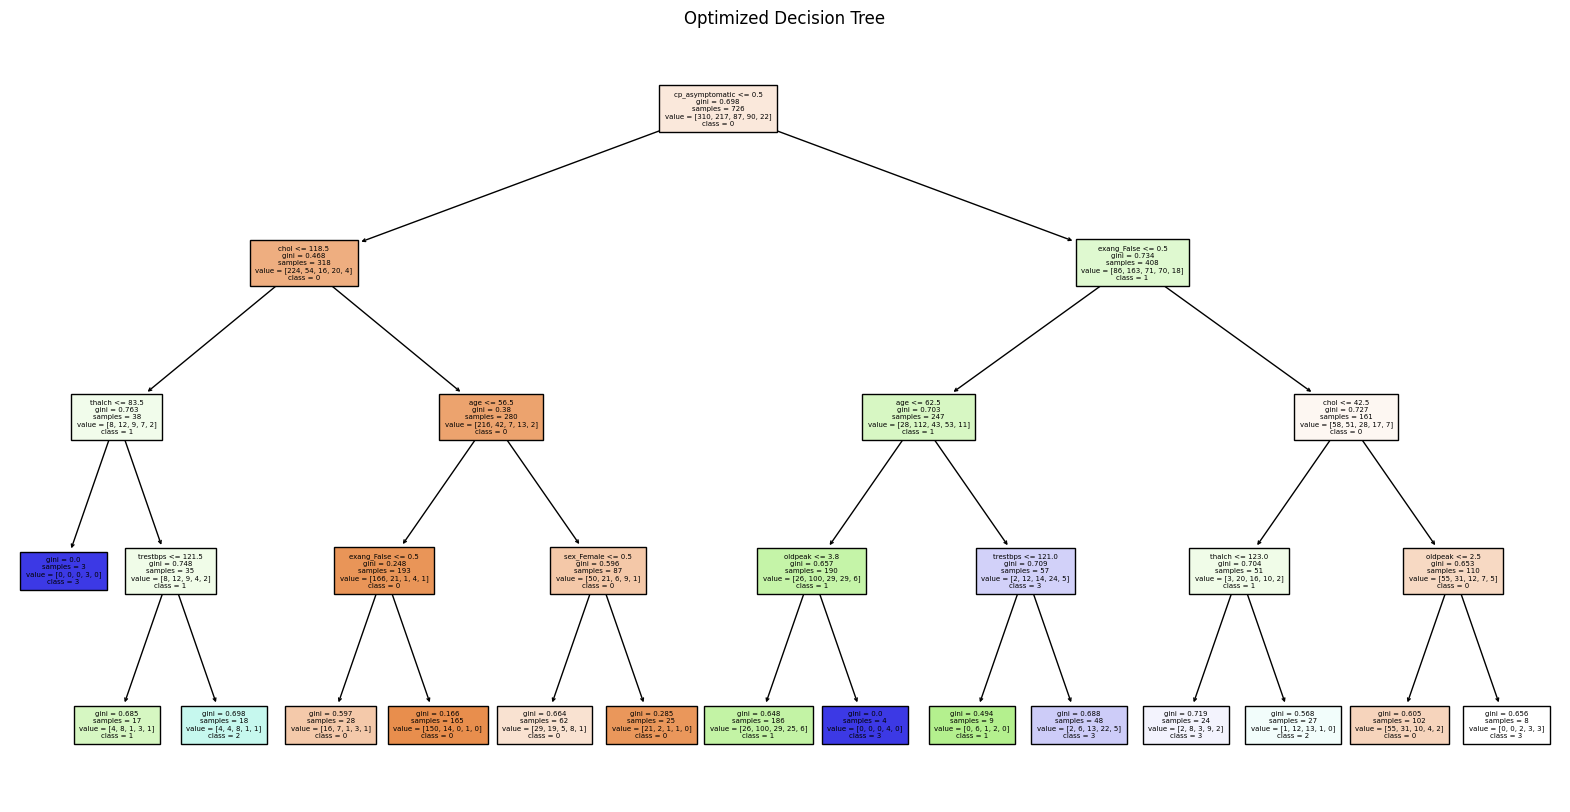

In [69]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the optimized decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=class_names, fontsize=5)
plt.title('Optimized Decision Tree')
plt.show()

## **Interview Questions:**

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**   
**ans.**

1. **Criterion**  

*   Description: Function to measure split quality.  
Options: gini, entropy.

*   Effect: gini is faster; entropy can be more informative but is slower.


2. **Max Depth**   
*   Description: Maximum depth of the tree.

  Effect:

*   Shallow Trees: Reduce overfitting but may underfit.
*   Deep Trees: Capture more detail but may overfit.

3. **Min Samples Split**   

*   Description: Minimum samples needed to split an internal node.   
Effect:  

*   High Value: Reduces overfitting.  
*   Low Value: Can lead to overfitting by splitting on fewer samples.

4. **Min Samples Leaf**

*   Description: Minimum samples needed at a leaf node.  
   Effect:  

*   High Value: Prevents overfitting.
*   Low Value: May lead to overfitting.

5. **Max Features**

*   Description: Number of features to consider for splits.

*   Options: auto (sqrt), log2, int, float.  
Effect:
*   Low Value: Reduces overfitting.
*   High Value: Can lead to overfitting.
















**2. What is the difference between the Label encoding and One-hot encoding?**  
**ans.**  
***Label Encoding***  

*   **Description**: Converts each category into a unique integer.
*   **How It Works**: Assigns a numerical value to each category (e.g., ['red', 'blue', 'green'] becomes [0, 1, 2]).
*   **Pros**: Simple and efficient; works well with ordinal data where order matters.
*   **Cons**: Can introduce ordinal relationships where none exist (e.g., 0 < 1 < 2), which might not be suitable for nominal data without a natural order.


***One-Hot Encoding***

*   **Description**: Converts each category into a binary vector where only one element is 1, and all others are 0.
*   **How It Works**: Creates a new binary feature for each category (e.g., ['red', 'blue', 'green'] becomes [1, 0, 0], [0, 1, 0], and [0, 0, 1] respectively).
*   **Pros**: Prevents the model from assuming an ordinal relationship between categories; better for nominal data.
*  **Cons**: Can result in a high-dimensional feature space, especially with many categories, potentially leading to increased computational cost and complexity.





